Importing Libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plty

# House Prices

In [4]:
data1 = pd.read_excel('/content/drive/MyDrive/Data_Mining /Assignment_1/housing.xlsx')

In [5]:
data1.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


 
 ## 1.Classify each variable type

In [6]:
print(data1.dtypes)

price        int64
lotsize      int64
bedrooms     int64
bathrms      int64
stories      int64
driveway    object
recroom     object
fullbase    object
gashw       object
airco       object
garagepl     int64
prefarea    object
dtype: object


Here in this data frame we have multiple variables, but before we elaborate on them, lets see a histogram of every column.

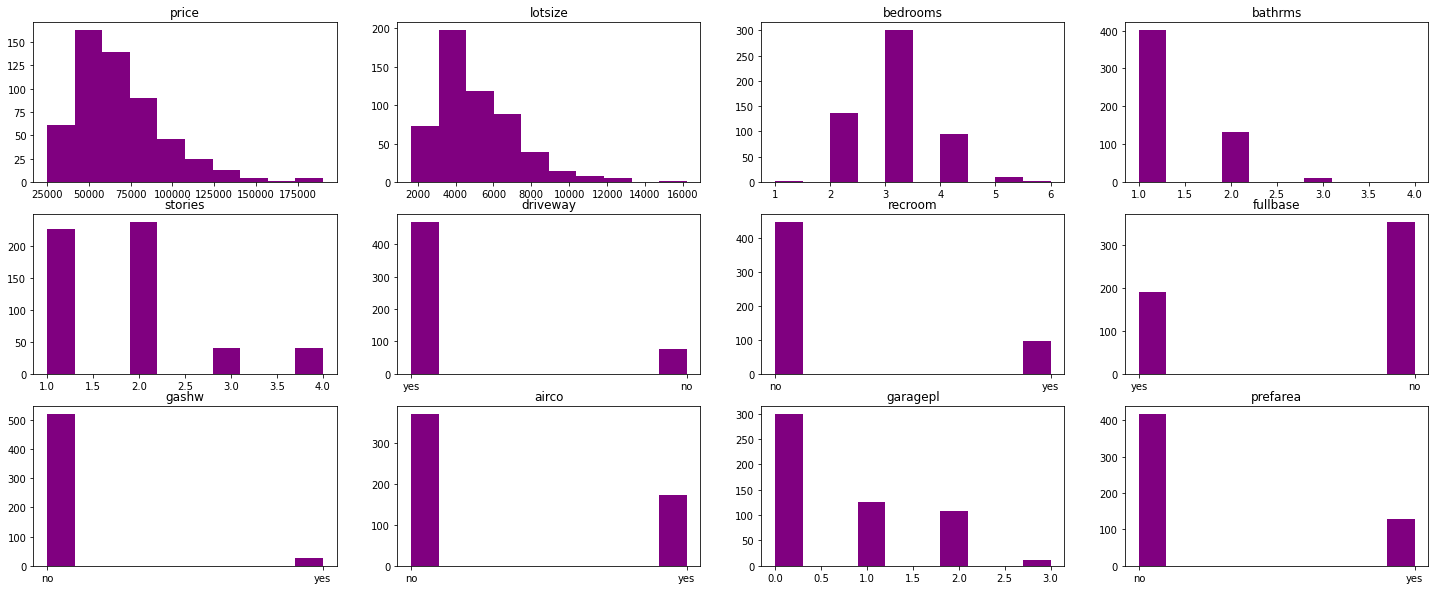

In [7]:
fig, ax = plt.subplots(3,4,figsize=(25,10))

ax[0,0].hist(data1['price'], color='purple')
ax[0,1].hist(data1['lotsize'], color='purple')
ax[0,2].hist(data1['bedrooms'], color='purple')
ax[0,3].hist(data1['bathrms'], color='purple')
ax[1,0].hist(data1['stories'], color='purple')
ax[1,1].hist(data1['driveway'], color='purple')
ax[1,2].hist(data1['recroom'], color='purple')
ax[1,3].hist(data1['fullbase'], color='purple')
ax[2,0].hist(data1['gashw'], color='purple')
ax[2,1].hist(data1['airco'], color='purple')
ax[2,2].hist(data1['garagepl'], color='purple')
ax[2,3].hist(data1['prefarea'], color='purple')

ax[0,0].set_title('price')
ax[0,1].set_title('lotsize')
ax[0,2].set_title('bedrooms')
ax[0,3].set_title('bathrms')
ax[1,0].set_title('stories')
ax[1,1].set_title('driveway')
ax[1,2].set_title('recroom')
ax[1,3].set_title('fullbase')
ax[2,0].set_title('gashw')
ax[2,1].set_title('airco')
ax[2,2].set_title('garagepl')
ax[2,3].set_title('prefarea')


plt.show()

**Price** :  if we can see in the first hist plot, the price of the apartment take in certain range between 25000 & 175000, however it is defined for a limited interval. given that price of an apartment can be any decimal value in that certain range, so we consider it as a **continous variable**.

**lotsize** : Here the lot size is ** Quantitive discrete variable**. a discrete variable can only take specific value or category.

**bedrooms**: it is a **Quantitative discrete variable**, since it can only have specific value within a range.

**bathrms** : **Quantitative discrete variable**

**stories : Quantitavie discrete variable**

**gashw : Quantitative discrete variable**

**airco : here we can witnsess only two values, those are Yes and No which are of  ** Categorical binary variable**

**garagepl : Quantitative discrete variable**

**prefarea** : **Categorical binary variable**

**driveway, recroom, fullbase : Categorical binary variable**

##2.Run descriptive statistics for price and lotsize

In [27]:
## descriptive statistics
def descriptive_statistics(data):
  mean = sum(data)/len(data)     # calculating mean

# To calculate median lets sort the data first in a descending order 
  sorted_data = sorted(data)
  if len(sorted_data) % 2 ==0 :
    median = (sorted_data[len(sorted_data) // 2 - 1] + sorted_data[len(sorted_data) // 2]) / 2
  else :
    median = sorted_data[len(sorted_data) // 2]
# To calculate mode
  freq = {}
  for x in data:
      freq[x] = freq.get(x, 0) + 1
  mode = max(freq, key=freq.get)

    # Calculate the range
  range_ = max(data) - min(data)

    # Calculate the variance
  variance = sum((x - mean) ** 2 for x in data) / len(data)

    # Calculate the standard deviation
  std_dev = variance ** 0.5

    # Return the results as a dictionary
  return {
        "mean": mean,
        "median": median,
        "mode": mode,
        "range": range_,
        "variance": variance,
        "standard deviation": std_dev 
  }


In [61]:
# descriptive statistics for price feature
data = data1['price']
stats = descriptive_statistics(data)
print(stats)

{'mean': 68121.59706959708, 'median': 62000.0, 'mode': 60000, 'range': 165000, 'variance': 711726713.9951553, 'standard deviation': 26678.206723750292}


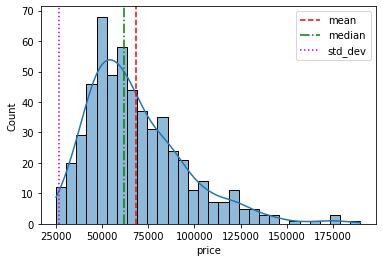

In [62]:
mean = stats['mean']
median = stats['median']
mode = stats['mode']
data_range = stats['range']
variance = stats['variance']
std_dev = stats['standard deviation']


sns.histplot(data1['price'], kde=True, bins=30)





plt.axvline(x=mean, color='r', linestyle='--', label='mean')
plt.axvline(x=median, color='g', linestyle='-.', label='median')
# plt.axvline(x=variance, color='m', linestyle=':', label='variance')
plt.axvline(x=std_dev, color='m', linestyle=':', label='std_dev')
plt.legend()

plt.show()

In [44]:

data = data1['lotsize']
stats = descriptive_statistics(data)
print(stats)

{'mean': 5150.2655677655675, 'median': 4600.0, 'mode': 6000, 'range': 14550, 'variance': 4692302.528374857, 'standard deviation': 2166.1723219482924}


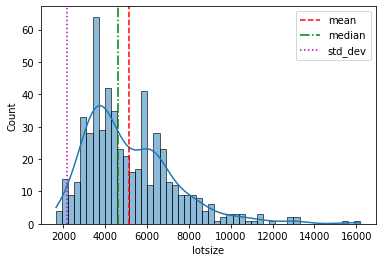

In [58]:
mean = stats['mean']
median = stats['median']
mode = stats['mode']
data_range = stats['range']
variance = stats['variance']
std_dev = stats['standard deviation']



sns.histplot(data1['lotsize'], kde=True, bins=50)





plt.axvline(x=mean, color='r', linestyle='--', label='mean')
plt.axvline(x=median, color='g', linestyle='-.', label='median')
# plt.axvline(x=variance, color='m', linestyle=':', label='variance')
plt.axvline(x=std_dev, color='m', linestyle=':', label='std_dev')
plt.legend()

plt.show()

## 3.Visualize box plot for price and lotsize

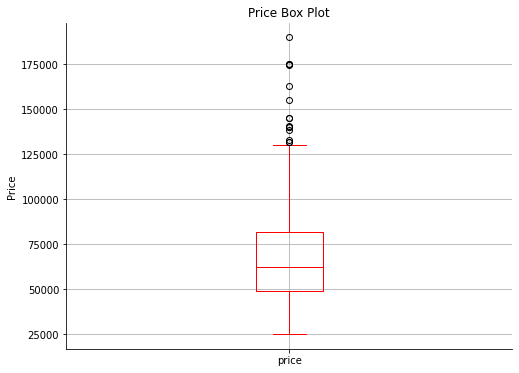

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))


data1.boxplot(column='price', color='red', whiskerprops={}, ax=ax)

# Set the title and axis labels
ax.set_title('Price Box Plot')
ax.set_ylabel('Price')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()





# data1.boxplot(column='price',color = 'red',whiskerprops={})
# plt.title('price')

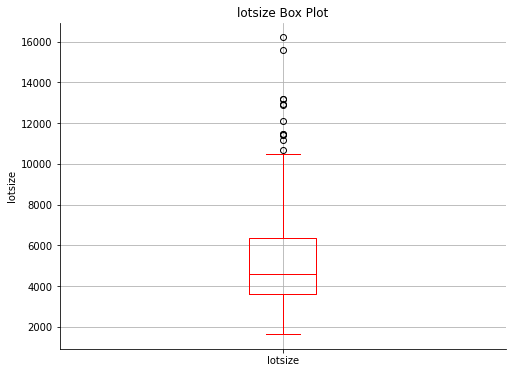

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))


data1.boxplot(column='lotsize', color='red', whiskerprops={}, ax=ax)

# Set the title and axis labels
ax.set_title('lotsize Box Plot')
ax.set_ylabel('lotsize')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

##4.identify outliers for box and price



In [13]:
# lets find Q1 and Q3

def outliers(data):
  Q1 = np.percentile(data,25)
  Q3 = np.percentile(data,75)
  IQR = Q3-Q1
  
  outliers = []
  for i in (data):
    if (i < Q1 - 1.5*IQR or i  > Q3+1.5*IQR):
      outliers.append(i)  
  # print("outliers",outliers)
  return outliers

In [14]:
# Outliers for price
data = data1['price']
price_outliers = outliers(data)
print('outliers for price:',sorted(price_outliers))
print('Number of outliers:',len(price_outliers))

outliers for price: [132000, 132000, 133000, 138300, 140000, 140000, 141000, 145000, 145000, 155000, 163000, 174500, 175000, 175000, 190000]
Number of outliers: 15


In [15]:
# Outliers for lotsize
data = data1['lotsize']
lotsize_outliers = outliers(data)
print('outliers for lotsize:',lotsize_outliers)
print('Number of outliers:',len(price_outliers))

outliers for lotsize: [12090, 10700, 15600, 13200, 16200, 13200, 11460, 11175, 11410, 11440, 12944, 12900]
Number of outliers: 15


#2.Statistical Descriptions of Data and handling missing Values 

a. Classify each variable’s type 
b. Run descriptive statistics for Age and Fare 
c. Visualize box plot for Age and Fare 
d. There are many methods for handling missing values. Describe them. Fill in the missing values in Age 
and explain the reason you choose the method 

In [16]:
data2 = pd.read_csv('/content/drive/MyDrive/Data_Mining /Assignment_1/train.csv')

  ##   a. Classify each variable’s type



In [17]:
data2.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nominal Variable :  It is a type of variable that describes a characteristic or quality of an individual or an object that cannot be quantified. Nominal variables can take on any one of a set of values, which are typically represented by labels or names.

Ordinal Variable : An ordinal variable is a type of categorical variable that has a natural order or ranking to the categories. The categories are usually labeled with numbers, words or other symbols that indicate a specific order or ranking.

**PassengerId	: Nominal Variable**

**Survived	: Binary Variable**

**Pclass	: Ordinal Variable**

**Name	: Nominal variable**

**Sex : Binary Variable**	

**Age : Continous Variable**	

**SibSp(No. of sibling/spouses) : discrete Variable**

**Parch : discrete variable**	

**Ticket : Nominal Variable**

**Fare : Continous Variable**

**Cabin : Nominal Variable**	

**Embarked : Nominal Variable**

In [19]:
missing_values_count = data2.isnull().sum()
print(missing_values_count)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Filling Missing values

There are various methods used for filling missing values:
1. Updating the missing values with mean/mode/median
2. replacing missing values with zero
3. Regression imputation

--> from the below scatter we can see there is no proper corelation or linearity between Age and fare or Age and other features to use Linear regression method as solution here to Predict missing values

--> Here i dont want to replace the missing values with zero, it would bias any analysis based on age towards zero since missing number is large. and while finding the mean and median and mode can give an inaccurate results

--> we can see from below, the data for age is closely normally distributed, since it has normal distribution, we know mean is the central tendency measure of data, here mean = median = mode.

from above explanation i believe using mean/median imputation to fill the missing values is a viable method here.

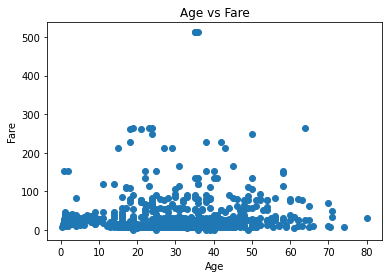

In [20]:
plt.scatter(data2['Age'], data2['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

# # Add a line of best fit
# x = data2['Age']
# y = data2['Fare']
# p = np.polyfit(x, y, 1)
# plt.plot(x, np.polyval(p, x), 'r')

In [21]:
age_no_zeros = data2[data2['Age'] != 0]['Age']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


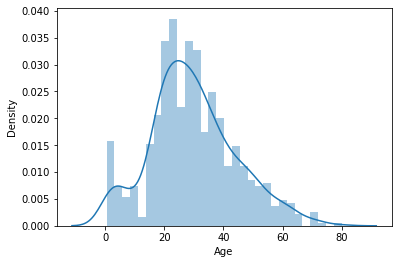

In [63]:
sns.distplot(age_no_zeros.dropna(), kde=True, bins=30)


Filling missing values with mean 

In [ ]:
Age_mean = data2['Age'].mean()
data2['Age'] = data2['Age'].fillna(Age_mean)

## b. Run descriptive statistics for Age and Fare

In [ ]:
# lets create a python function which can run descriptive statistics
def descriptive_statistics(data):
  mean = sum(data)/len(data)     # calculating mean

# To calculate median lets sort the data first in a descending order 
  sorted_data = sorted(data)
  if len(sorted_data) % 2 ==0 :
    median = (sorted_data[len(sorted_data) // 2 - 1] + sorted_data[len(sorted_data) // 2]) / 2
  else :
    median = sorted_data[len(sorted_data) // 2]
# To calculate mode
  freq = {}
  for x in data:
      freq[x] = freq.get(x, 0) + 1
  mode = max(freq, key=freq.get)

    # Calculate the range
  range_ = max(data) - min(data)

    # Calculate the variance
  variance = sum((x - mean) ** 2 for x in data) / len(data)

    # Calculate the standard deviation
  std_dev = variance ** 0.5

    # Return the results as a dictionary
  return {
        "mean": mean,
        "median": median,
        "mode": mode,
        "range": range_,
        "variance": variance,
        "standard deviation": std_dev 
  }


In [ ]:
# Descriptive statistics for Age
data = data2['Age']
stats = descriptive_statistics(data)
print(stats)

In [ ]:
# Descriptive statistics for Fare
data = data2['Fare']
stats = descriptive_statistics(data)
print(stats)

## Box plot for Age and Fare 

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))


data2.boxplot(column='Age', color='red', whiskerprops={}, ax=ax)

# Set the title and axis labels
ax.set_title('Age Box Plot')
ax.set_ylabel('Age')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [ ]:
data = data2['Age']
Age_outliers = outliers(data)
print('outliers for Age:',sorted(Age_outliers))
print('Number of outliers:',len(Age_outliers))



In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))


data2.boxplot(column='Fare', color='red', whiskerprops={}, ax=ax)

# Set the title and axis labels
ax.set_title('Fare Box Plot')
ax.set_ylabel('Fare')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [ ]:
data = data2['Fare']
Fare_outliers = outliers(data)
print('outliers for Fare:',sorted(Fare_outliers))
print('Number of outliers:',len(Fare_outliers))
